In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings(action='once')
#warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
# import pickle

In [3]:
class lm:
    def __init__(self,X,y):
        self.random_state = np.random.randint(0,10000)
        self.X,self.y = X.copy(),y.copy()
        self.init()
    
    def init(self):
        self.Xtr, self.Xte, self.ytr, self.yte = train_test_split(self.X, self.y, test_size=0.3,random_state=self.random_state)
        self.model = LinearRegression()
        self.model.fit(self.Xtr,self.ytr)
        self.y_predict = self.model.predict(self.Xte)

    def R2(self):
        print('train R² = {}'.format(self.model.score(self.Xtr, self.ytr).round(3)))
        print('test R² = {}'.format(metrics.r2_score(self.yte, self.y_predict).round(3)))
        return
    
    def other_metrics(self):
        EQM = metrics.mean_squared_error(self.yte, self.y_predict).round(3)
        REQM = np.sqrt(metrics.mean_squared_error(self.yte, self.y_predict)).round(3)
        R2 = metrics.r2_score(self.yte, self.y_predict).round(3)
        return pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])
        
    def summary(self):
        X_train_com_constante = sm.add_constant(self.Xtr)
        modelo_statsmodels = sm.OLS(self.ytr, X_train_com_constante, hasconst = True).fit()
        print(modelo_statsmodels.summary())
        #return (modelo_statsmodels.summary().tables[1])
    
    def predict(self,X):
        return self.model.predict(X)

    def add_x(self,x,replace=True):
        # pd.Series -> None
        self.X[x.name] = x
        self.init()
        

    def remove_x(self,listNames,replace=True):
        self.X.drop(columns = listNames)
        self.init()
    
    def scale(self,cols):
        for col in cols:
            self.X[col] =  MinMaxScaler().fit_transform(self.X[[col]])
        self.init()


    def compare(self,other):
        pass

    def copy(self):
        return self
        

In [4]:
dfini = pd.read_csv('C:/Users/lpdon/OneDrive/Área de Trabalho/lucas/library-lpd/python ds models/linear regression/house prices/archive/kc_house_data.csv', sep=',')
print(dfini.shape)
dfini.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
dfini.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
dfini.corr().price > 0.35

id               False
price             True
bedrooms         False
bathrooms         True
sqft_living       True
sqft_lot         False
floors           False
waterfront       False
view              True
condition        False
grade             True
sqft_above        True
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15     True
sqft_lot15       False
Name: price, dtype: bool

In [11]:
#df = df[['id','price','bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','sqft_living15']]
df = dfini[['id','price','bathrooms','sqft_living','view','grade','sqft_above']]
df['logprice'] = np.log(df.price)

C:\Users\lpdon\AppData\Local\Temp\ipykernel_12216\3298014323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['logprice'] = np.log(df.price)


In [12]:
df.corr().price

id            -0.016762
price          1.000000
bathrooms      0.525138
sqft_living    0.702035
view           0.397293
grade          0.667434
sqft_above     0.605567
logprice       0.891654
Name: price, dtype: float64

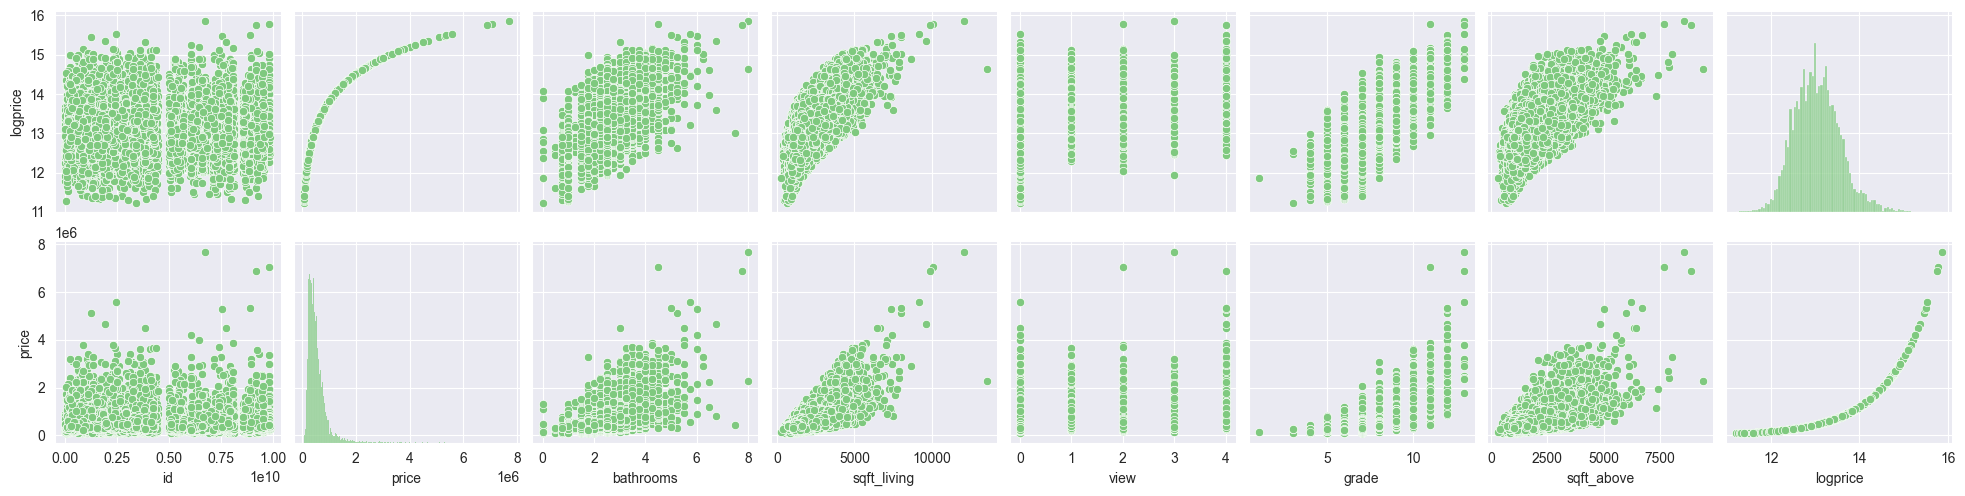

In [13]:
d = df.copy()
sns.pairplot(d,y_vars=['logprice','price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

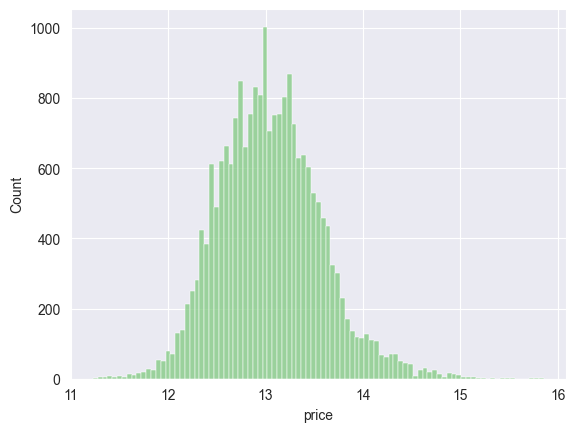

In [14]:
sns.histplot(np.log(df.price))

In [15]:
df.corr().logprice

id            -0.003819
price          0.891654
bathrooms      0.550802
sqft_living    0.695341
view           0.346522
grade          0.703634
sqft_above     0.601801
logprice       1.000000
Name: logprice, dtype: float64

In [27]:
X = df[['bathrooms','sqft_living','view','grade','sqft_above']]
Y = df.price

In [28]:
model = lm(X,Y)
model.summary()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     4127.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:28:46   Log-Likelihood:            -2.0898e+05
No. Observations:               15129   AIC:                         4.180e+05
Df Residuals:                   15123   BIC:                         4.180e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.842e+05   1.59e+04    -36.797      

In [29]:
model = lm(X,Y)
#model.scale(['bathrooms','sqft_living','view','grade','sqft_above'])
#model.summary()
model.other_metrics()

,Métricas
EQM,4.827896e+10
REQM,2.197247e+05
R²,5.680000e-01


In [33]:
X2 = dfini[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','sqft_living15']]
Y = df.logprice
model = lm(X2,Y)
model.summary()
#model.other_metrics()

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     4034.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:29:44   Log-Likelihood:                -970.71
No. Observations:               15129   AIC:                             1967.
Df Residuals:                   15116   BIC:                             2067.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -44.1184      0.818    -53.928

In [34]:

import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
dfini['logprice'] = np.log(dfini.price)
df = dfini.copy()


train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','yr_built','zipcode']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred1 = poly.predict(X_testpoly)
rmsepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Root Mean Squared Error (RMSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[]})
evaluation_poly.loc[0] = ['Polynomial Regression','degree=2, selected features, no preprocessing',rmsepoly1,rtrpoly1,'-',rtepoly1,'-',cv1]
evaluation_poly


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Polynomial Regression,"degree=2, selected features, no preprocessing",191054.283,0.73,-,0.716,-,0.714
